In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv',index_col=0)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 8)

In [6]:
# checking for null values
df.isnull().any()

Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

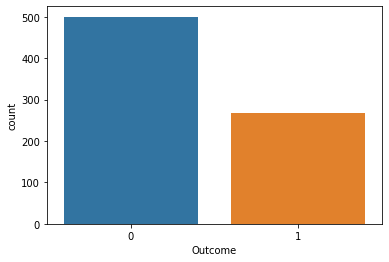

In [9]:
sns.countplot(df['Outcome'])

In [10]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B361F44048>,
      dtype=object)

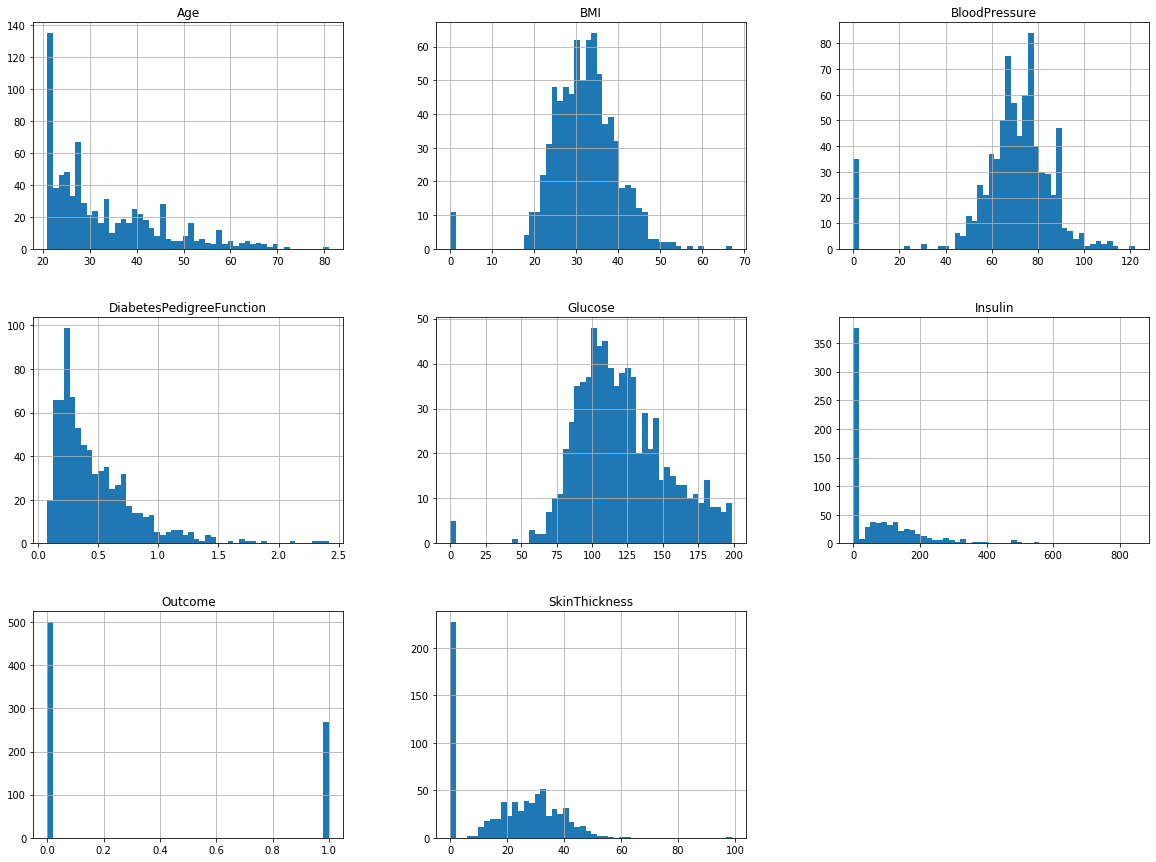

In [12]:
# This will show all individual attributes detail
df.hist(bins=50,figsize=(20,15))

In [13]:
# correlation value could be in range [-1,1]
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [15]:
# Split data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(df_train)}\nRows in test set: {len(df_test)}\n")

Rows in train set: 614
Rows in test set: 154



In [16]:
df_train.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
X_train=df_train.drop("Outcome",axis=1)
Y_train=df_train.Outcome

In [18]:
X_train.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [19]:
X_test=df_test.drop("Outcome",axis=1)
Y_test=df_test.Outcome

In [20]:
X_test.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()

In [22]:
clf1.fit(X_train,Y_train)

C:\Users\KAUSHAL\Anaconda3\kaushal\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
print("Random forest: ",clf1.score(X_train,Y_train))

Random forest:  0.990228013029316


In [24]:
test_predict = clf1.predict(X_test)

In [25]:
# Predict by giving attributes input
aa=np.array([[85,66,29,0,26.6,0.351,31]])
tt = clf1.predict(aa)
tt

array([0], dtype=int64)